In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

fare pf
mar del plata ar
ligayan ph
port elizabeth za
khokhlovo ru
port alfred za
new norfolk au
mys shmidta ru
ushuaia ar
vilhena br
aguimes es
wad madani sd
karratha au
tiksi ru
barranca pe
suluq ly
yulara au
barrow us
qaanaaq gl
kruisfontein za
hilo us
new norfolk au
valley city us
amlame tg
port blair in
taolanaro mg
balgazyn ru
mataura pf
kailua us
lyuban by
mataura pf
jamestown sh
lahijan ir
rikitea pf
bathsheba bb
bengkulu id
orebro se
ushuaia ar
hermanus za
eyemouth gb
tasiilaq gl
ribeira grande pt
illoqqortoormiut gl
punta arenas cl
tuktoyaktuk ca
nikolskoye ru
saldanha za
hamilton us
illoqqortoormiut gl
amursk ru
tiksi ru
takoradi gh
samarai pg
tuatapere nz
bluff nz
kodiak us
punta arenas cl
faya td
torbay ca
constitucion mx
carnarvon au
hermanus za
port elizabeth za
hilo us
saint-philippe re
longyearbyen sj
ilulissat gl
rikitea pf
busselton au
korla cn
port elizabeth za
port hardy ca
mahebourg mu
atherton au
kargasok ru
marsaxlokk mt
busselton au
belushya guba ru
anapskaya r

bluff nz
saint-francois gp
nome us
lata sb
taolanaro mg
alice springs au
puerto ayora ec
birao cf
rawlins us
honiara sb
ushuaia ar
sinnamary gf
iskateley ru
punta arenas cl
tuktoyaktuk ca
coquimbo cl
hofn is
khatanga ru
saint helens us
souillac mu
rikitea pf
bonavista ca
ushuaia ar
castro cl
ahipara nz
port elizabeth za
marsaxlokk mt
lagoa pt
cherskiy ru
palestine us
lakes entrance au
punta arenas cl
carnarvon au
oktyabrskoye ru
sao sebastiao br
saldanha za
saldanha za
rujewa tz
mys shmidta ru
kapaa us
ushuaia ar
barrow us
mataura pf
zonguldak tr
taltal cl
dikson ru
saleaula ws
saint-joseph re
nome us
morros br
barrow us
bethel us
jamestown sh
bredasdorp za
tuktoyaktuk ca
ushuaia ar
barrow us
keetmanshoop na
bengkulu id
upernavik gl
busselton au
kimbe pg
ribeira grande pt
taolanaro mg
rikitea pf
haines junction ca
lolua tv
nikolskoye ru
belushya guba ru
san patricio mx
punta arenas cl
labuhan id
dandong cn
bluff nz
puerto ayora ec
mys shmidta ru
albany au
imeni morozova ru
bandarbeyla 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

ed4d6b85637f097f23bc5d112acbaa2d

In [7]:
import requests
requests.__version__

'2.23.0'

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fare
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | ligayan
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | khokhlovo
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | vilhena
Processing Record 11 of Set 1 | aguimes
Processing Record 12 of Set 1 | wad madani
Processing Record 13 of Set 1 | karratha
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | barranca
Processing Record 16 of Set 1 | suluq
Processing Record 17 of Set 1 | yulara
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | valley city
Processing R

Processing Record 41 of Set 4 | swan hill
Processing Record 42 of Set 4 | champerico
Processing Record 43 of Set 4 | qidong
Processing Record 44 of Set 4 | kiunga
Processing Record 45 of Set 4 | sajanan
Processing Record 46 of Set 4 | wangqing
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | kloulklubed
Processing Record 49 of Set 4 | nurtingen
Processing Record 50 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 1 of Set 5 | belem de sao francisco
Processing Record 2 of Set 5 | inhambane
Processing Record 3 of Set 5 | mumford
Processing Record 4 of Set 5 | ust-ilimsk
Processing Record 5 of Set 5 | paciran
Processing Record 6 of Set 5 | hobart
Processing Record 7 of Set 5 | araouane
Processing Record 8 of Set 5 | rujewa
Processing Record 9 of Set 5 | shingu
Processing Record 10 of Set 5 | straumen
Processing Record 11 of Set 5 | walvis bay
Processing Record 12 of Set 5 | yarada
Processing Record 13 of Set 5 | ballina
Processing Record 14 of Set 5 | n

Processing Record 28 of Set 8 | thurso
Processing Record 29 of Set 8 | rawson
Processing Record 30 of Set 8 | saint-francois
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | lata
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | birao
Processing Record 35 of Set 8 | rawlins
Processing Record 36 of Set 8 | iskateley
Processing Record 37 of Set 8 | saint helens
Processing Record 38 of Set 8 | bonavista
Processing Record 39 of Set 8 | palestine
Processing Record 40 of Set 8 | lakes entrance
Processing Record 41 of Set 8 | oktyabrskoye
Processing Record 42 of Set 8 | sao sebastiao
Processing Record 43 of Set 8 | zonguldak
Processing Record 44 of Set 8 | taltal
Processing Record 45 of Set 8 | saleaula
City not found. Skipping...
Processing Record 46 of Set 8 | saint-joseph
Processing Record 47 of Set 8 | morros
Processing Record 48 of Set 8 | keetmanshoop
Processing Record 49 of Set 8 | upernavik
Processing Record 50 of Set 8 | kimbe
Processin

Processing Record 10 of Set 12 | stornoway
Processing Record 11 of Set 12 | manado
Processing Record 12 of Set 12 | monrovia
Processing Record 13 of Set 12 | taburi
City not found. Skipping...
Processing Record 14 of Set 12 | whitehorse
Processing Record 15 of Set 12 | chilliwack
Processing Record 16 of Set 12 | revelstoke
Processing Record 17 of Set 12 | lagunas
Processing Record 18 of Set 12 | lev tolstoy
Processing Record 19 of Set 12 | zacatepec
Processing Record 20 of Set 12 | college
Processing Record 21 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 12 | muros
Processing Record 23 of Set 12 | puerto colombia
Processing Record 24 of Set 12 | endirey
Processing Record 25 of Set 12 | fayaoue
Processing Record 26 of Set 12 | la peca
Processing Record 27 of Set 12 | lazo
Processing Record 28 of Set 12 | shupiyan
Processing Record 29 of Set 12 | nishihara
Processing Record 30 of Set 12 | jiangyou
Processing Record 31 of Set 12 | tura
Processing Record 32 

In [12]:
len(city_data)

550

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fare,-16.70,-151.02,80.65,78,12,6.53,PF,2020-06-14 17:57:23
1,Mar Del Plata,-38.00,-57.56,54.00,44,0,10.29,AR,2020-06-14 17:52:25
2,Ligayan,4.65,119.47,84.38,72,94,7.18,PH,2020-06-14 17:57:24
3,Port Elizabeth,-33.92,25.57,60.80,59,61,11.41,ZA,2020-06-14 17:54:17
4,Khokhlovo,59.15,37.40,60.80,67,19,2.24,RU,2020-06-14 17:57:24
5,Port Alfred,-33.59,26.89,63.00,73,69,5.01,ZA,2020-06-14 17:56:47
6,New Norfolk,-42.78,147.06,54.00,81,68,1.99,AU,2020-06-14 17:57:25
7,Ushuaia,-54.80,-68.30,32.00,91,20,4.70,AR,2020-06-14 17:53:11
8,Vilhena,-12.74,-60.15,83.28,51,34,5.12,BR,2020-06-14 17:57:25
9,Aguimes,27.91,-15.45,75.20,64,75,20.80,ES,2020-06-14 17:57:25


In [14]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        550 non-null    object 
 1   Lat         550 non-null    float64
 2   Lng         550 non-null    float64
 3   Max Temp    550 non-null    float64
 4   Humidity    550 non-null    int64  
 5   Cloudiness  550 non-null    int64  
 6   Wind Speed  550 non-null    float64
 7   Country     550 non-null    object 
 8   Date        550 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 38.8+ KB


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(50)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fare,PF,2020-06-14 17:57:23,-16.70,-151.02,80.65,78,12,6.53
1,Mar Del Plata,AR,2020-06-14 17:52:25,-38.00,-57.56,54.00,44,0,10.29
2,Ligayan,PH,2020-06-14 17:57:24,4.65,119.47,84.38,72,94,7.18
3,Port Elizabeth,ZA,2020-06-14 17:54:17,-33.92,25.57,60.80,59,61,11.41
4,Khokhlovo,RU,2020-06-14 17:57:24,59.15,37.40,60.80,67,19,2.24
5,Port Alfred,ZA,2020-06-14 17:56:47,-33.59,26.89,63.00,73,69,5.01
6,New Norfolk,AU,2020-06-14 17:57:25,-42.78,147.06,54.00,81,68,1.99
7,Ushuaia,AR,2020-06-14 17:53:11,-54.80,-68.30,32.00,91,20,4.70
8,Vilhena,BR,2020-06-14 17:57:25,-12.74,-60.15,83.28,51,34,5.12
9,Aguimes,ES,2020-06-14 17:57:25,27.91,-15.45,75.20,64,75,20.80


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

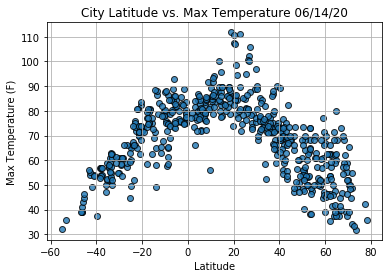

In [18]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

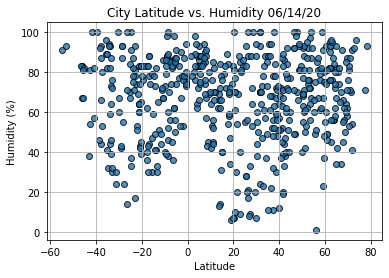

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

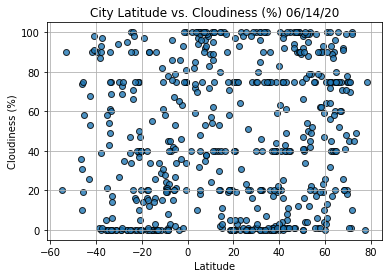

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

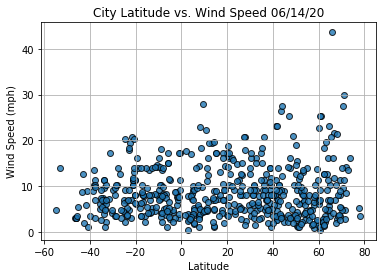

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
545     True
546    False
547    False
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ligayan,PH,2020-06-14 17:57:24,4.65,119.47,84.38,72,94,7.18
4,Khokhlovo,RU,2020-06-14 17:57:24,59.15,37.40,60.80,67,19,2.24
9,Aguimes,ES,2020-06-14 17:57:25,27.91,-15.45,75.20,64,75,20.80
10,Wad Madani,SD,2020-06-14 17:57:26,14.40,33.52,95.54,31,100,8.84
12,Tiksi,RU,2020-06-14 17:57:26,71.69,128.87,34.05,91,100,2.91
...,...,...,...,...,...,...,...,...,...
543,Borogontsy,RU,2020-06-14 17:59:58,62.67,131.17,52.45,96,93,4.90
544,Hue,VN,2020-06-14 17:59:58,16.47,107.60,82.40,83,40,3.36
545,San Alberto,CO,2020-06-14 17:59:58,7.76,-73.39,85.42,69,35,2.86
548,Bismil,TR,2020-06-14 17:59:59,37.85,40.67,71.60,52,40,4.70


In [25]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

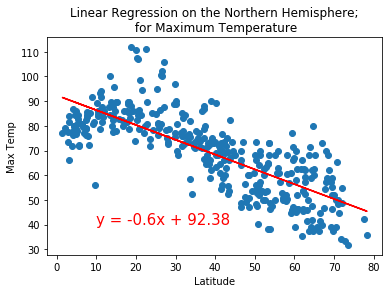

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere;\n for Maximum Temperature', 'Max Temp',(10,40))

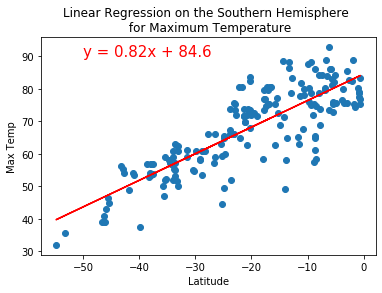

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

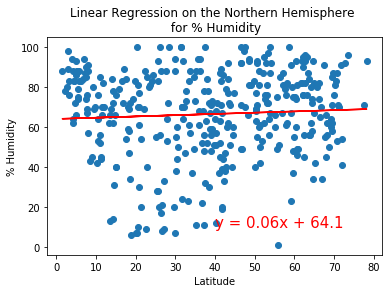

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

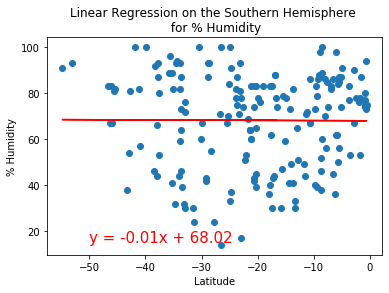

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

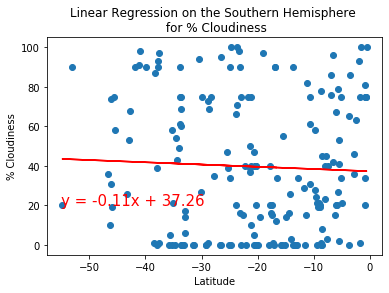

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,20))

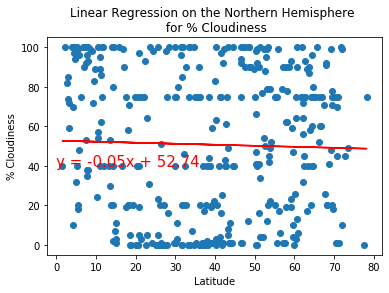

In [32]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,40))

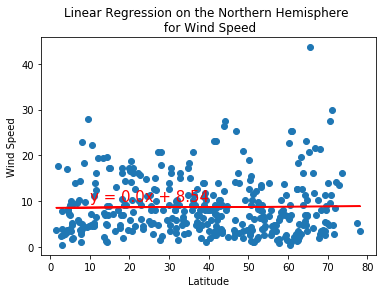

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,10))

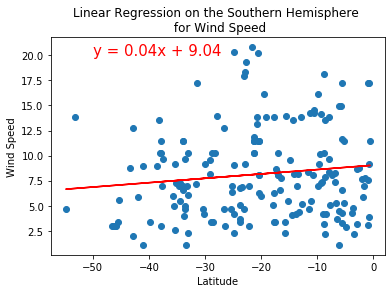

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))